<h1 style="text-align: center">
<strong>UNALM: PRÁCTICA CALIFICADA 3 - API Spoonacular</strong>
</h1>

**INTEGRANTES:**
1. Pichardo Diestra, Oliverio
2. Ortiz Arone, Víctor Alejandro
3. Llamoca León, Israel
4. Quispe Cueva, Jorge Antonio

**GRUPO:** 7

# 1. DESCRIPCIÓN DE LA API
API de Spoonacular es un servicio web que ofrece una variedad de funciones relacionadas con la cocina y los alimentos. Algunas de las funciones que se ofrecen a través de la API incluyen la búsqueda de recetas, la búsqueda de ingredientes, la generación de menús y la generación de listas de compras. Los desarrolladores pueden utilizar la API para integrar estas funciones en sus propias aplicaciones y sitios web.

# 2. LIBRERÍAS, MÓDULOS Y PAQUETES
A fin de realizar la extracción de datos pertinentes, se emplearán las siguientes librerías, módulos o paquetes:

In [1]:
# %pip install matplotlib.pyplot
import requests # hacer peticiones HTTP a servidores web
import pandas as pd 
import matplotlib.pyplot as plt
import re

Matplotlib is building the font cache; this may take a moment.


# 2. EXTRACCIÓN Y VISUALIZACIÓN DE LA INFORMACIÓN
A continuación se procederá a extraer la información de la recetas similares a la receta de *Spiced Apples*.

In [2]:
# Clave de API de Spoonacular
api_key = "1a60313c31a84c6d80a50e336bd18421"
# ID de la receta de la que se desea encontrar recetas similares
recipe_id = 47746
# Realizar una llamada a la API para obtener recetas similares
url = f"https://api.spoonacular.com/recipes/{recipe_id}/similar"
query_params = {"apiKey": api_key}
response = requests.get(url, params=query_params).json()
response

[{'id': 456541,
  'imageType': 'jpg',
  'title': 'Spiced Apples',
  'readyInMinutes': 45,
  'servings': 8,
  'sourceUrl': 'http://allrecipes.com/Recipe/Spiced-Apples/'},
 {'id': 48263,
  'imageType': 'jpg',
  'title': 'Chicken & Spiced Apples',
  'readyInMinutes': 35,
  'servings': 6,
  'sourceUrl': 'http://www.eatingwell.com/recipes/chicken_spiced_apples.html'},
 {'id': 313917,
  'imageType': 'jpeg',
  'title': 'Spiced Apples and Raisins',
  'readyInMinutes': 38,
  'servings': 4,
  'sourceUrl': 'http://www.foodnetwork.com/recipes/tyler-florence/spiced-apples-and-raisins-recipe.html'},
 {'id': 403407,
  'imageType': 'jpg',
  'title': 'Glazed Spiced Apples',
  'readyInMinutes': 25,
  'servings': 10,
  'sourceUrl': 'http://www.tasteofhome.com/recipes/glazed-spiced-apples'},
 {'id': 586610,
  'imageType': 'jpg',
  'title': 'Vanilla Spiced Apples',
  'readyInMinutes': 35,
  'servings': 8,
  'sourceUrl': 'http://www.nutmegnanny.com/2011/05/02/vanilla-spiced-apples/'},
 {'id': 403413,
  'ima

Ahora, se procede a colocar todo en un dataframe.

In [3]:
df = pd.DataFrame(response)
df

,id,imageType,title,readyInMinutes,servings,sourceUrl
0,456541,jpg,Spiced Apples,45,8,http://allrecipes.com/Recipe/Spiced-Apples/
1,48263,jpg,Chicken & Spiced Apples,35,6,http://www.eatingwell.com/recipes/chicken_spic...
2,313917,jpeg,Spiced Apples and Raisins,38,4,http://www.foodnetwork.com/recipes/tyler-flore...
3,403407,jpg,Glazed Spiced Apples,25,10,http://www.tasteofhome.com/recipes/glazed-spic...
4,586610,jpg,Vanilla Spiced Apples,35,8,http://www.nutmegnanny.com/2011/05/02/vanilla-...
5,403413,jpg,Spiced Baked Apples,45,2,http://www.tasteofhome.com/Recipes/spiced-bake...
6,930836,jpeg,Spiced Chicken with Apples,40,4,http://www.foodnetwork.com/recipes/food-networ...
7,613138,jpg,Pork Chops with Spiced Apples,75,4,http://www.jessicagavin.com/test-kitchen/seafo...


Transformemos las variables *readyInMinutes* en proporciones.

In [4]:
df["readyInMinutes_perc"] = (df["readyInMinutes"] / df["readyInMinutes"].sum()) * 100
df

,id,imageType,title,readyInMinutes,servings,sourceUrl,readyInMinutes_perc
0,456541,jpg,Spiced Apples,45,8,http://allrecipes.com/Recipe/Spiced-Apples/,13.313609
1,48263,jpg,Chicken & Spiced Apples,35,6,http://www.eatingwell.com/recipes/chicken_spic...,10.355030
2,313917,jpeg,Spiced Apples and Raisins,38,4,http://www.foodnetwork.com/recipes/tyler-flore...,11.242604
3,403407,jpg,Glazed Spiced Apples,25,10,http://www.tasteofhome.com/recipes/glazed-spic...,7.396450
4,586610,jpg,Vanilla Spiced Apples,35,8,http://www.nutmegnanny.com/2011/05/02/vanilla-...,10.355030
5,403413,jpg,Spiced Baked Apples,45,2,http://www.tasteofhome.com/Recipes/spiced-bake...,13.313609
6,930836,jpeg,Spiced Chicken with Apples,40,4,http://www.foodnetwork.com/recipes/food-networ...,11.834320
7,613138,jpg,Pork Chops with Spiced Apples,75,4,http://www.jessicagavin.com/test-kitchen/seafo...,22.189349


Visualicemos lo anterior mediante un gráfico circular.

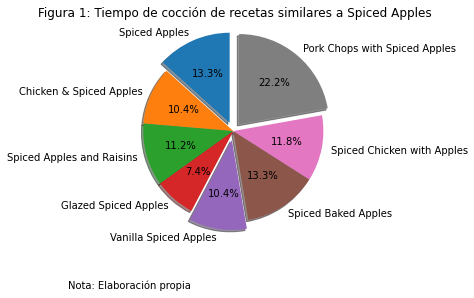

In [5]:
tiempo_coccion_plt = list(df["title"])
# Declarar el tamaño de cada 'rebanada' y en sumatoria todos deben dar al 100%
sizes = list(df["readyInMinutes_perc"])
# En este punto señalamos qué posición debe 'resaltarse' y el valor, si se coloca 0, se omite
explode = (0.1, 0, 0, 0, 0.1, 0, 0, 0.1)  
# Generar el marco de subploteos
fig1, ax1 = plt.subplots()
# Crear el gráfico, añadiendo los valores
ax1.pie(sizes, explode=explode, labels=tiempo_coccion_plt, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Figura 1: Tiempo de cocción de recetas similares a Spiced Apples")
plt.annotate('Nota: Elaboración propia', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.legend()
plt.show()

Ahora, visualicemos que receta similar a Spiced Apples brinda una mayor cantidad de porciones.

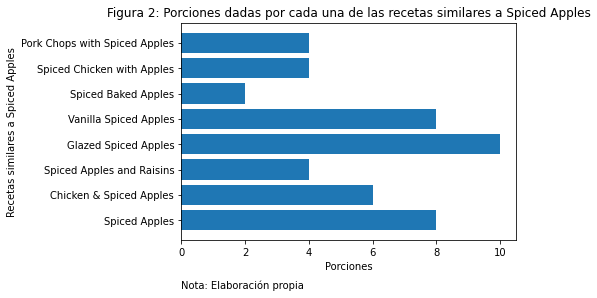

In [6]:
plt.barh(list(df["title"]), list(df["servings"]))
plt.xlabel('Porciones')
plt.ylabel('Recetas similares a Spiced Apples')
plt.title('Figura 2: Porciones dadas por cada una de las recetas similares a Spiced Apples')
plt.annotate('Nota: Elaboración propia', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Debido a que no se cuenta con mayor información de cada una de las recetas similares a Spiced Apples, se procederá a acceder a la información de cada una de tales recetas mediante otras peticiones.

In [7]:
# Extracción de todos lo IDs de las recetas similares
id = df["id"]
# Creación de un dataframe vacío que almacenará la información extraída de cada una de las recetas similares
df_list = []
# Proceso iterativo de la extracción de la información de cada una de las recetas similares
for ids in id:
    url = f"https://api.spoonacular.com/recipes/{ids}/nutritionWidget.json"
    query_params = {"apiKey": api_key}
    response = requests.get(url, params=query_params).json()
    df_aux = pd.DataFrame(response["bad"])
    # Agrega una columna "id" al DataFrame con el valor del identificador actual
    df_aux["id"] = ids
    df_list.append(df_aux)

result_df = pd.concat(df_list)
# Resetea los índices en el DataFrame resultante
result_df.reset_index(drop=True, inplace=True)
result_df

,title,amount,indented,percentOfDailyNeeds,id
0,Calories,126,False,6.31,456541
1,Fat,0.32g,False,0.49,456541
2,Saturated Fat,0.05g,True,0.32,456541
3,Carbohydrates,33g,False,11.15,456541
4,Sugar,26g,True,29.52,456541
5,Cholesterol,0.0mg,False,0.00,456541
6,Sodium,1mg,False,0.08,456541
7,Calories,204,False,10.22,48263
8,Fat,7g,False,11.28,48263
9,Saturated Fat,2g,True,14.36,48263


Procedamos a realizar comparaciones de algunas características en común de las recetas similares a la receta de Spiced Apples.

## 2.1. Comparación de calorías

In [8]:
recetas_amount_cal = result_df.loc[result_df['title'].isin(["Calories"]), ['amount', 'id']]
recetas_amount_cal.reset_index(drop=True, inplace=True)

Ahora, recuperemos los nombres de cada una de las recetas según su ID.

In [9]:
recetas_amount_cal["title"] = list(df["title"])
recetas_amount_cal

,amount,id,title
0,126,456541,Spiced Apples
1,204,48263,Chicken & Spiced Apples
2,206,313917,Spiced Apples and Raisins
3,170,403407,Glazed Spiced Apples
4,132,586610,Vanilla Spiced Apples
5,404,403413,Spiced Baked Apples
6,354,930836,Spiced Chicken with Apples
7,456k,613138,Pork Chops with Spiced Apples


Creando una nueva columna sin unidades para calorías.

In [10]:
for i in range(len(recetas_amount_cal)):
    recetas_amount_cal.loc[i, "amount_nounid"] = re.sub(r'\D', '', recetas_amount_cal.loc[i, "amount"])
recetas_amount_cal

,amount,id,title,amount_nounid
0,126,456541,Spiced Apples,126
1,204,48263,Chicken & Spiced Apples,204
2,206,313917,Spiced Apples and Raisins,206
3,170,403407,Glazed Spiced Apples,170
4,132,586610,Vanilla Spiced Apples,132
5,404,403413,Spiced Baked Apples,404
6,354,930836,Spiced Chicken with Apples,354
7,456k,613138,Pork Chops with Spiced Apples,456


Ahora, veamos qué receta posee mayor cantidad de calorías.

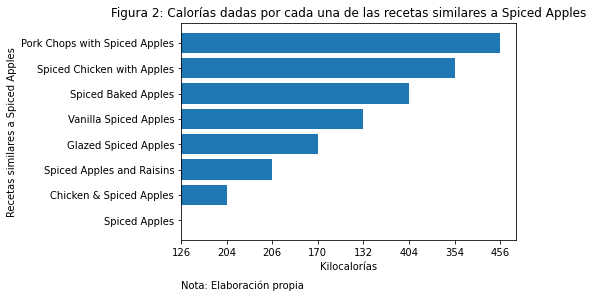

In [11]:
plt.barh(list(recetas_amount_cal["title"]), list(recetas_amount_cal["amount_nounid"]))
plt.xlabel('Kilocalorías')
plt.ylabel('Recetas similares a Spiced Apples')
plt.title('Figura 2: Calorías dadas por cada una de las recetas similares a Spiced Apples')
plt.annotate('Nota: Elaboración propia', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

De lo anterior, se tiene que *Pork Chops with Spiced Apples* tiene la mayor cantidad de kilocalorías.

## 2.2. Comparación de azucar

In [13]:
recetas_amount_az = result_df.loc[result_df['title'].isin(["Sugar"]), ['amount', 'id']]
recetas_amount_az.reset_index(drop=True, inplace=True)

Ahora, recuperemos los nombres de cada una de las recetas según su ID.

In [14]:
recetas_amount_az["title"] = list(df["title"])
recetas_amount_az

,amount,id,title
0,26g,456541,Spiced Apples
1,6g,48263,Chicken & Spiced Apples
2,27g,313917,Spiced Apples and Raisins
3,36g,403407,Glazed Spiced Apples
4,21g,586610,Vanilla Spiced Apples
5,50g,403413,Spiced Baked Apples
6,16g,930836,Spiced Chicken with Apples
7,27g,613138,Pork Chops with Spiced Apples


Creando una nueva columna sin unidades para azúcar.

In [15]:
for i in range(len(recetas_amount_az)):
    recetas_amount_az.loc[i, "amount_nounid"] = re.sub(r'\D', '', recetas_amount_az.loc[i, "amount"])
recetas_amount_az

,amount,id,title,amount_nounid
0,26g,456541,Spiced Apples,26
1,6g,48263,Chicken & Spiced Apples,6
2,27g,313917,Spiced Apples and Raisins,27
3,36g,403407,Glazed Spiced Apples,36
4,21g,586610,Vanilla Spiced Apples,21
5,50g,403413,Spiced Baked Apples,50
6,16g,930836,Spiced Chicken with Apples,16
7,27g,613138,Pork Chops with Spiced Apples,27


Ahora, veamos qué receta posee mayor cantidad de azúcar.

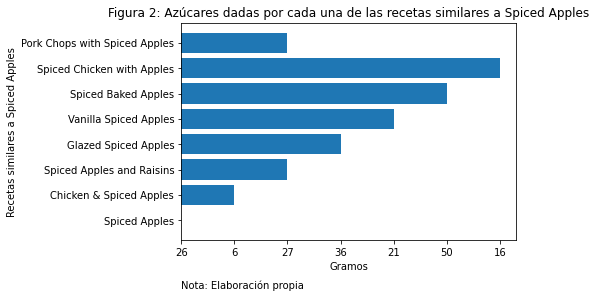

In [16]:
plt.barh(list(recetas_amount_az["title"]), list(recetas_amount_az["amount_nounid"]))
plt.xlabel('Gramos')
plt.ylabel('Recetas similares a Spiced Apples')
plt.title('Figura 2: Azúcares dadas por cada una de las recetas similares a Spiced Apples')
plt.annotate('Nota: Elaboración propia', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

De lo anterior, se tiene que *Spiced Chicken with Apples* tiene la mayor cantidad de azúcar.